In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('netmeds.csv')

In [3]:
df.head()

,Unnamed: 0,Medicine Name,Composition,Manufacturer,MRP,Best Price
0,1,Atrest 12.5mg Tablet 10'S,TETRABENAZINE 12.5MG,ADHD,154.04,123.23
1,2,Atrest 25mg Tablet 10'S,TETRABENAZINE 25MG,ADHD,261.49,209.19
2,3,Capnea Injection 1ml,Caffeine Citrate 20 MG,ADHD,277.38,249.64
3,4,COGNIX + Tablet 10's,GINKGO BILOBA 120 mg,ADHD,117,93.6
4,5,NOR 4mg Injection 2ml,NOREPINEPHRINE 4MG,ADHD,56,50.4


In [4]:
#Print the DataTypes in the given dataset
print(f'DataTypes in given dataset: \n{df.dtypes}')

DataTypes in given dataset: 
Unnamed: 0        int64
Medicine Name    object
Composition      object
Manufacturer     object
MRP              object
Best Price       object
dtype: object


In [5]:
#print the memory usage of the given dataset
print(f'Memory usage in bytes: \n{df.memory_usage()}')

Memory usage in bytes: 
Index               128
Unnamed: 0       219560
Medicine Name    219560
Composition      219560
Manufacturer     219560
MRP              219560
Best Price       219560
dtype: int64


In [6]:
#Print info of the given dateset
print(f'Information about the given dataset: ')
print("")
print({df.info()})

Information about the given dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27445 entries, 0 to 27444
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     27445 non-null  int64 
 1   Medicine Name  27445 non-null  object
 2   Composition    27425 non-null  object
 3   Manufacturer   27445 non-null  object
 4   MRP            27445 non-null  object
 5   Best Price     27445 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.3+ MB
{None}


In [7]:
df['Affliction'] = df['Manufacturer']
del df['Manufacturer']
df['MRP'] = df['MRP'].str.extract('(\d+\.\d+)')

In [8]:
df['MRP'] = df['MRP'].str.replace('[^\d.]', '', regex=True).astype(float)
df['Best Price'] = df['Best Price'].str.replace('[^\d.]', '', regex=True).astype(float)

In [9]:
def remove_outliers_using_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    filter = (df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)
    return df.loc[filter]

df = remove_outliers_using_iqr('MRP')
df = remove_outliers_using_iqr('Best Price')
del df['Unnamed: 0']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11275 entries, 0 to 27443
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Medicine Name  11275 non-null  object 
 1   Composition    11272 non-null  object 
 2   MRP            11275 non-null  float64
 3   Best Price     11275 non-null  float64
 4   Affliction     11275 non-null  object 
dtypes: float64(2), object(3)
memory usage: 528.5+ KB


In [11]:
df.head()

,Medicine Name,Composition,MRP,Best Price,Affliction
0,Atrest 12.5mg Tablet 10'S,TETRABENAZINE 12.5MG,154.04,123.23,ADHD
1,Atrest 25mg Tablet 10'S,TETRABENAZINE 25MG,261.49,209.19,ADHD
2,Capnea Injection 1ml,Caffeine Citrate 20 MG,277.38,249.64,ADHD
21,Acnedap Gel 15gm,DAPSONE 5%W/W,362.03,289.62,Acne
22,Acnedap Plus Gel 15gm,ADAPALENE 0.1%+DAPSONE 5%,350.90,280.72,Acne


In [12]:
df['Composition'].head()

0            TETRABENAZINE 12.5MG  
1              TETRABENAZINE 25MG  
2          Caffeine Citrate 20 MG  
21                  DAPSONE 5%W/W  
22      ADAPALENE 0.1%+DAPSONE 5%  
Name: Composition, dtype: object

In [13]:
# Use regex to extract medicine name and strength
df['Medicine'] = df['Composition'].str.extract(r'(^.*?)(?=\d|\%|$)')
df['Strength'] = df['Composition'].str.extract(r'(\d+\.?\d*\s?[MmGg%]*W?/?W?)')
df.head()


,Medicine Name,Composition,MRP,Best Price,Affliction,Medicine,Strength
0,Atrest 12.5mg Tablet 10'S,TETRABENAZINE 12.5MG,154.04,123.23,ADHD,TETRABENAZINE,12.5MG
1,Atrest 25mg Tablet 10'S,TETRABENAZINE 25MG,261.49,209.19,ADHD,TETRABENAZINE,25MG
2,Capnea Injection 1ml,Caffeine Citrate 20 MG,277.38,249.64,ADHD,Caffeine Citrate,20 MG
21,Acnedap Gel 15gm,DAPSONE 5%W/W,362.03,289.62,Acne,DAPSONE,5%W/W
22,Acnedap Plus Gel 15gm,ADAPALENE 0.1%+DAPSONE 5%,350.90,280.72,Acne,ADAPALENE,0.1%


In [14]:
df.head()

,Medicine Name,Composition,MRP,Best Price,Affliction,Medicine,Strength
0,Atrest 12.5mg Tablet 10'S,TETRABENAZINE 12.5MG,154.04,123.23,ADHD,TETRABENAZINE,12.5MG
1,Atrest 25mg Tablet 10'S,TETRABENAZINE 25MG,261.49,209.19,ADHD,TETRABENAZINE,25MG
2,Capnea Injection 1ml,Caffeine Citrate 20 MG,277.38,249.64,ADHD,Caffeine Citrate,20 MG
21,Acnedap Gel 15gm,DAPSONE 5%W/W,362.03,289.62,Acne,DAPSONE,5%W/W
22,Acnedap Plus Gel 15gm,ADAPALENE 0.1%+DAPSONE 5%,350.90,280.72,Acne,ADAPALENE,0.1%


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11275 entries, 0 to 27443
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Medicine Name  11275 non-null  object 
 1   Composition    11272 non-null  object 
 2   MRP            11275 non-null  float64
 3   Best Price     11275 non-null  float64
 4   Affliction     11275 non-null  object 
 5   Medicine       11272 non-null  object 
 6   Strength       10879 non-null  object 
dtypes: float64(2), object(5)
memory usage: 704.7+ KB


**Univariate Data Analysis**

In [16]:
df.columns

Index(['Medicine Name', 'Composition', 'MRP', 'Best Price', 'Affliction',
       'Medicine', 'Strength'],
      dtype='object')

<Axes: ylabel='Frequency'>

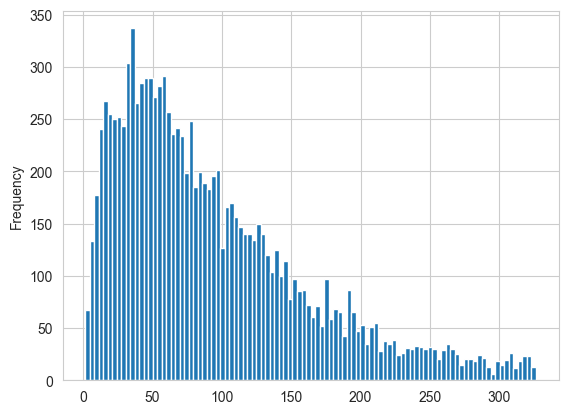

In [17]:
df['Best Price'].plot(kind = 'hist', bins=100)

<Axes: ylabel='Frequency'>

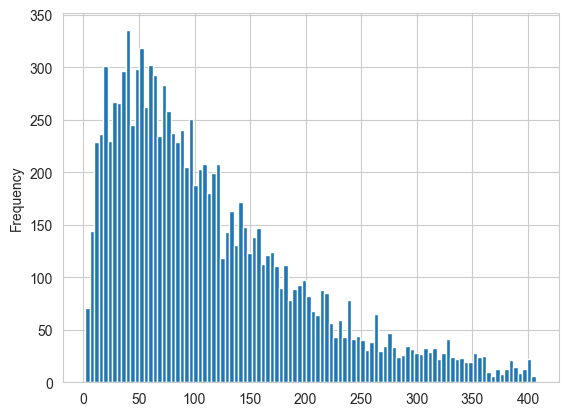

In [18]:
df['MRP'].plot(kind = 'hist', bins=100)

**Bivariate Analysis**

Correlation between MRP and Best Price: 0.9970117190124062


<Axes: xlabel='MRP', ylabel='Best Price'>

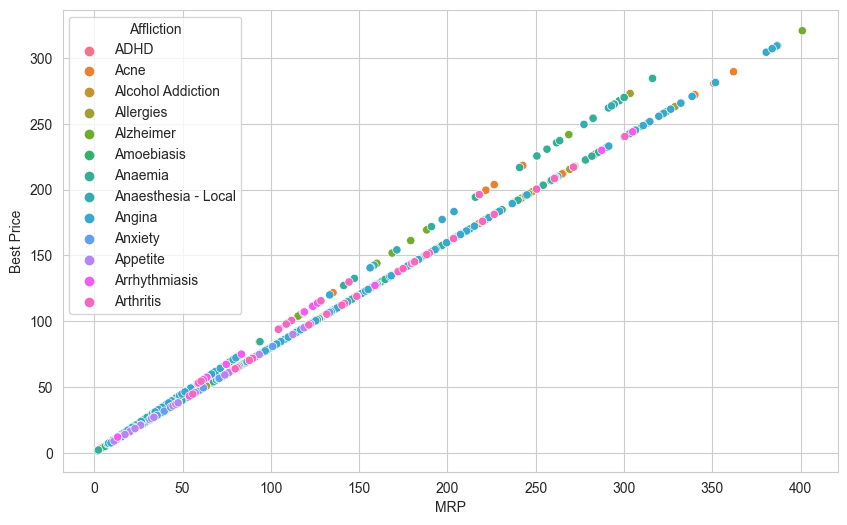

In [19]:
correlation = df[['MRP', 'Best Price']].corr()
print("Correlation between MRP and Best Price:", correlation.iloc[0, 1])

plt.figure(figsize = (10, 6))
sns.scatterplot(x = df['MRP'], y = df['Best Price'], hue = df['Affliction'][:1000])

<Axes: xlabel='Medicine', ylabel='Strength'>

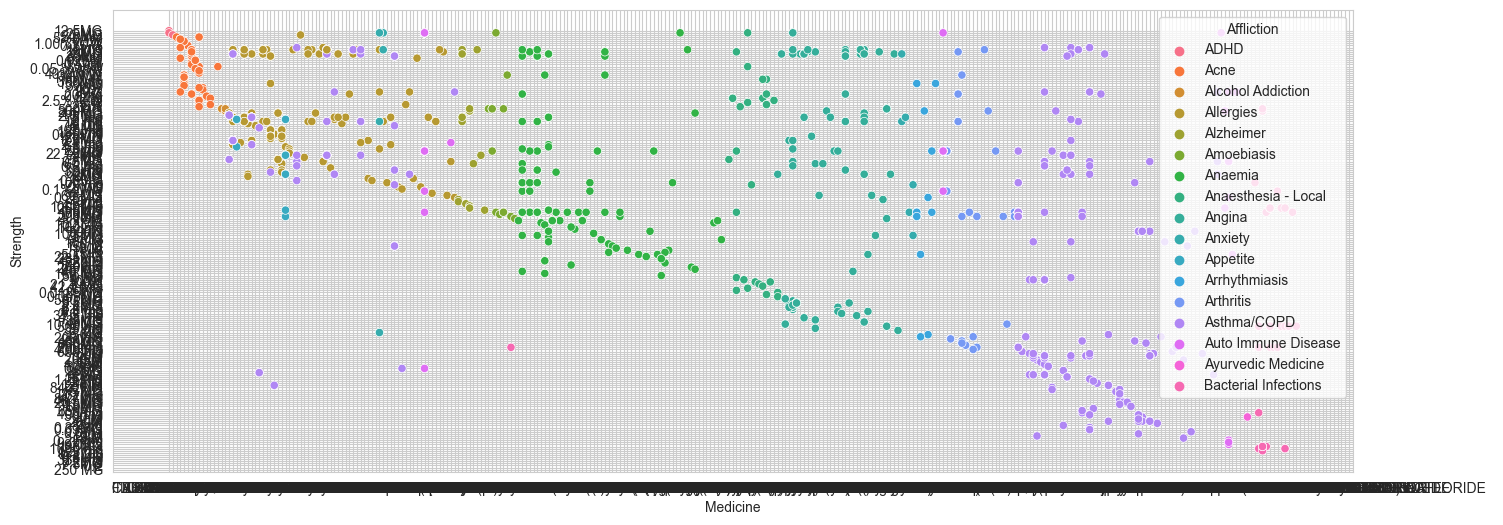

In [20]:
plt.figure(figsize = (16, 6))
sns.scatterplot(x = df['Medicine'], y = df['Strength'], hue = df['Affliction'][:1500])

<Axes: xlabel='Medicine', ylabel='Strength'>

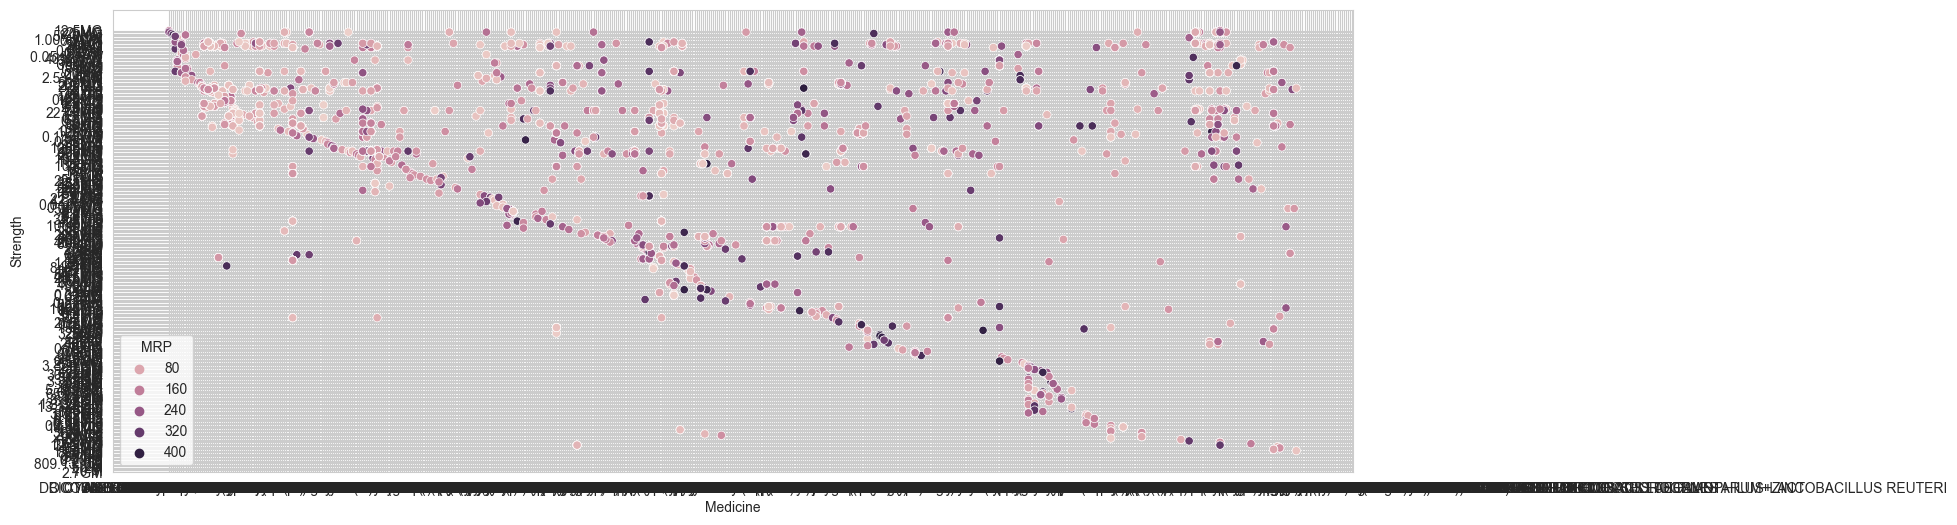

In [21]:
plt.figure(figsize = (16, 6))
sns.scatterplot(x = df['Medicine'], y = df['Strength'], hue = df['MRP'][:3000])

<Axes: xlabel='Affliction', ylabel='Best Price'>

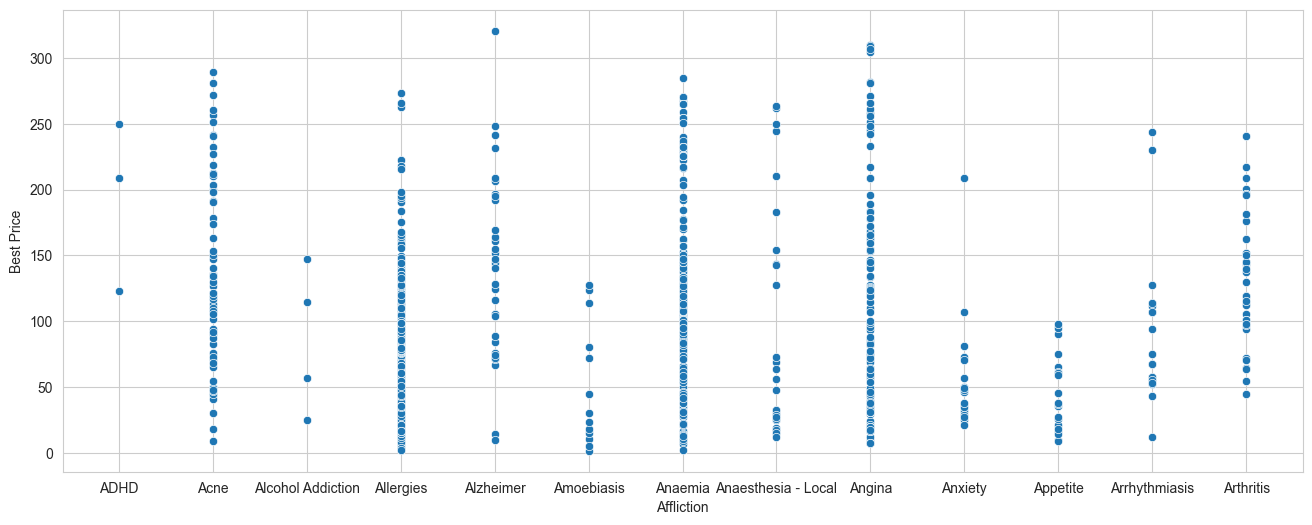

In [22]:
plt.figure(figsize = (16, 6))
sns.scatterplot(x = df['Affliction'][:1000], y = df['Best Price'])

In [23]:
#plt.figure(figsize=(15, 5))
#sns.violinplot(y = df['Best Price'], x = df['MRP'])

Infection                  622
Hypertension               619
Diabetes                   518
Epilepsy/Convulsion        492
High Cholesterol           490
Pain relief                487
Cough And Cold             474
Ulcer/Reflux/Flatulence    462
Allergies                  402
Hormonal Therapy           394
Name: Affliction, dtype: int64


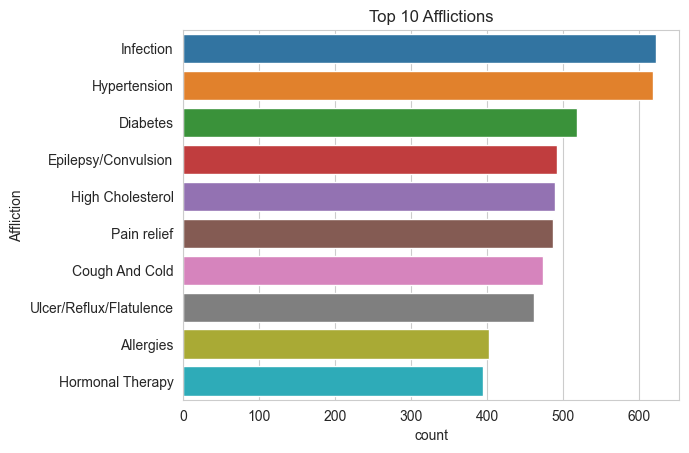

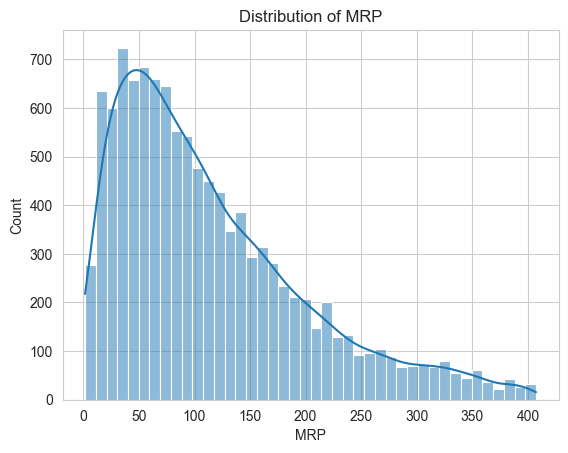

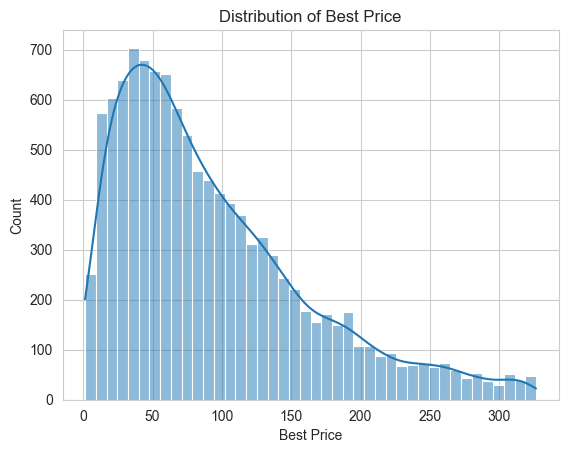

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded your dataframe as df
# Univariate Analysis:

# Affliction:
print(df['Affliction'].value_counts().head(10))  # Top 10 Afflictions
sns.countplot(y=df['Affliction'], order=df['Affliction'].value_counts().index[:10])
plt.title('Top 10 Afflictions')
plt.show()

# MRP:
sns.histplot(df['MRP'], kde=True)
plt.title('Distribution of MRP')
plt.show()

# Best Price:
sns.histplot(df['Best Price'], kde=True)
plt.title('Distribution of Best Price')
plt.show()

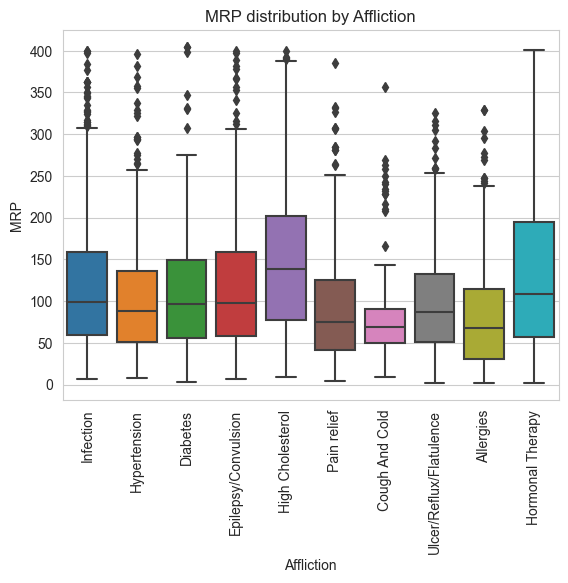

In [25]:
# Box plot of MRP by Affliction (top 10 Afflictions for better visualization)
top_afflictions = df['Affliction'].value_counts().index[:10]
sns.boxplot(y=df['MRP'], x=df['Affliction'], order=top_afflictions)
plt.xticks(rotation=90)
plt.title('MRP distribution by Affliction')
plt.show()

Classification

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Prepare data
df = df.dropna()  # Dropping rows with NaN values
df_1000 = df[:100]
X = df_1000[['MRP', 'Best Price']]
X['Strength'] = LabelEncoder().fit_transform(df_1000['Strength'])
X['Affliction'] = LabelEncoder().fit_transform(df_1000['Affliction'])

y = LabelEncoder().fit_transform(df['Medicine'])

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X[:100], y[:100], test_size=0.1, random_state=42)

C:\Users\aryan\AppData\Local\Temp\ipykernel_23308\541244119.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Strength'] = LabelEncoder().fit_transform(df_1000['Strength'])
C:\Users\aryan\AppData\Local\Temp\ipykernel_23308\541244119.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Affliction'] = LabelEncoder().fit_transform(df_1000['Affliction'])


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train and predict
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Metrics
accuracy = (y_pred == y_test).mean()
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))


c:\Users\aryan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 20.00%
              precision    recall  f1-score   support

          11       0.00      0.00      0.00         1
         129       1.00      0.50      0.67         2
         267       0.00      0.00      0.00         0
         389       0.00      0.00      0.00         0
         507       0.00      0.00      0.00         0
         655       0.00      0.00      0.00         3
         715       0.33      1.00      0.50         1
         716       0.00      0.00      0.00         1
         756       0.00      0.00      0.00         1
        1124       0.00      0.00      0.00         1

    accuracy                           0.20        10
   macro avg       0.13      0.15      0.12        10
weighted avg       0.23      0.20      0.18        10



c:\Users\aryan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aryan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aryan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [28]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = (y_pred == y_test).mean()
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

Accuracy: 30.00%
              precision    recall  f1-score   support

          11       0.00      0.00      0.00         1
         129       0.50      0.50      0.50         2
         223       0.00      0.00      0.00         0
         304       0.00      0.00      0.00         0
         317       0.00      0.00      0.00         0
         507       0.00      0.00      0.00         0
         655       0.50      0.67      0.57         3
         715       0.00      0.00      0.00         1
         716       0.00      0.00      0.00         1
         756       0.00      0.00      0.00         1
        1124       0.00      0.00      0.00         1

    accuracy                           0.30        10
   macro avg       0.09      0.11      0.10        10
weighted avg       0.25      0.30      0.27        10



c:\Users\aryan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aryan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aryan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Ensemble Methods

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Initializing and training the classifier
clf_rfc = RandomForestClassifier()
clf_rfc.fit(X_train, y_train)

# Predictions and accuracy
y_pred1 = clf_rfc.predict(X_test)

accuracy = (y_pred1 == y_test).mean()
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred1))

Accuracy: 20.00%
              precision    recall  f1-score   support

          11       0.00      0.00      0.00         1
         129       0.40      1.00      0.57         2
         223       0.00      0.00      0.00         0
         507       0.00      0.00      0.00         0
         655       0.00      0.00      0.00         3
         715       0.00      0.00      0.00         1
         716       0.00      0.00      0.00         1
         756       0.00      0.00      0.00         1
        1124       0.00      0.00      0.00         1

    accuracy                           0.20        10
   macro avg       0.04      0.11      0.06        10
weighted avg       0.08      0.20      0.11        10



c:\Users\aryan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aryan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aryan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gbc = GradientBoostingClassifier()
clf_gbc.fit(X_train, y_train)
y_pred2 = clf_gbc.predict(X_test)

accuracy = (y_pred2 == y_test).mean()
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred2))

Accuracy: 30.00%
              precision    recall  f1-score   support

          11       0.00      0.00      0.00         1
         129       0.67      1.00      0.80         2
         223       0.00      0.00      0.00         0
         507       0.00      0.00      0.00         0
         655       0.33      0.33      0.33         3
         715       0.00      0.00      0.00         1
         716       0.00      0.00      0.00         1
         743       0.00      0.00      0.00         0
         756       0.00      0.00      0.00         1
        1124       0.00      0.00      0.00         1

    accuracy                           0.30        10
   macro avg       0.10      0.13      0.11        10
weighted avg       0.23      0.30      0.26        10



c:\Users\aryan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aryan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aryan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

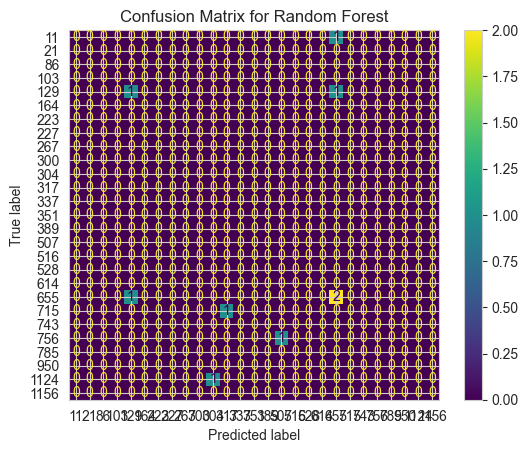

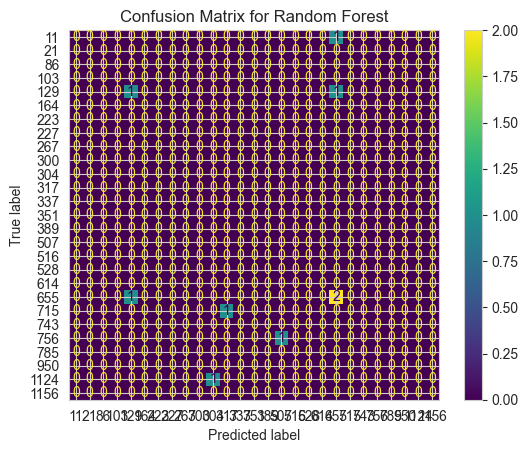

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# For Random Forest
cm = confusion_matrix(y_test, y_pred, labels=clf_rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_rfc.classes_,)
disp.plot()
plt.title('Confusion Matrix for Random Forest')
plt.show()

# For Gradient Boosting
cm = confusion_matrix(y_test, y_pred, labels=clf_gbc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_gbc.classes_,)
disp.plot()
plt.title('Confusion Matrix for Random Forest')
plt.show()

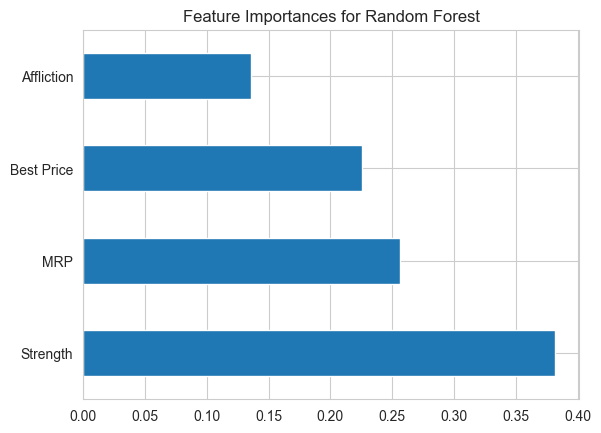

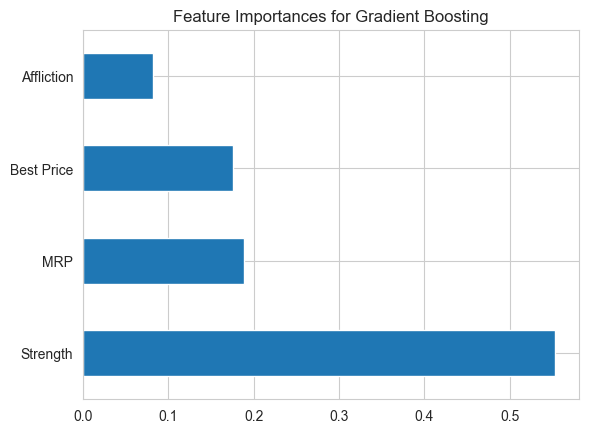

In [32]:
# For Random Forest
feat_importances = pd.Series(clf_rfc.feature_importances_, index=X.columns)
feat_importances.nlargest().plot(kind='barh')
plt.title('Feature Importances for Random Forest')
plt.show()

# For Gradient Boosting
feat_importances = pd.Series(clf_gbc.feature_importances_, index=X.columns)
feat_importances.nlargest().plot(kind='barh')
plt.title('Feature Importances for Gradient Boosting')
plt.show()

c:\Users\aryan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\aryan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\aryan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\aryan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\aryan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetri

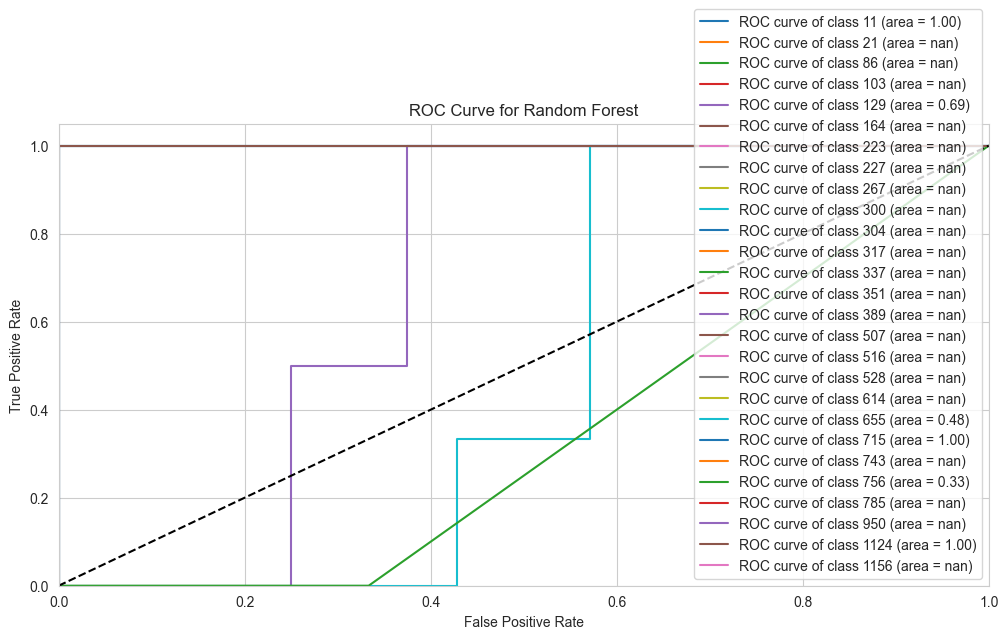

c:\Users\aryan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\aryan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\aryan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\aryan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\aryan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetri

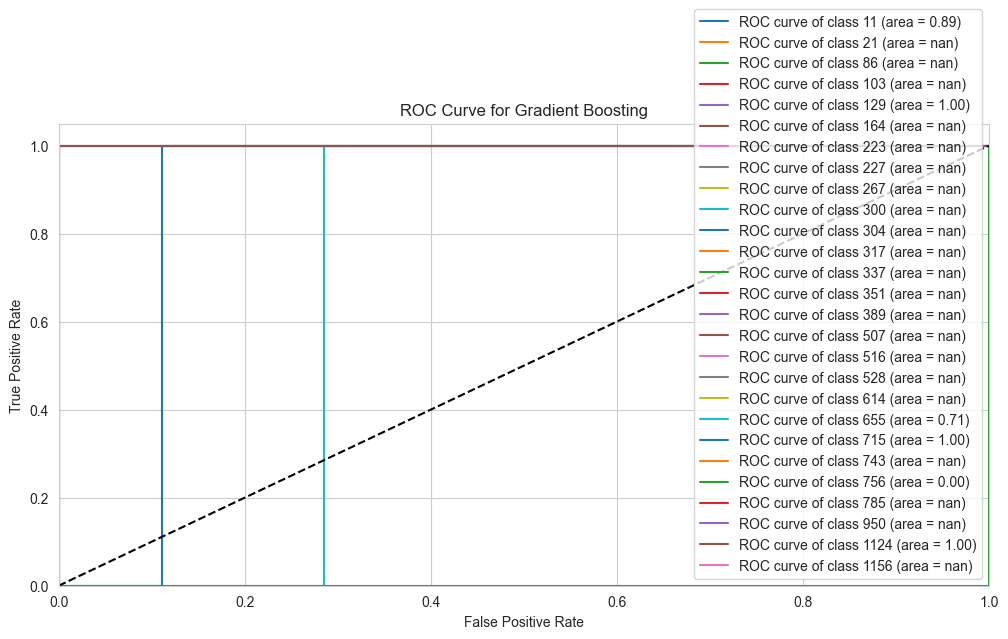

In [33]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output labels
y_bin = label_binarize(y_test, classes=clf_rfc.classes_)
n_classes = y_bin.shape[1]

# For Random Forest
y_score_rfc = clf_rfc.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr_rfc = dict()
tpr_rfc = dict()
roc_auc_rfc = dict()
for i in range(n_classes):
    fpr_rfc[i], tpr_rfc[i], _ = roc_curve(y_bin[:, i], y_score_rfc[:, i])
    roc_auc_rfc[i] = auc(fpr_rfc[i], tpr_rfc[i])

# Plot ROC curve for Random Forest
plt.figure(figsize=(12, 6))
for i in range(n_classes):
    plt.plot(fpr_rfc[i], tpr_rfc[i], label=f'ROC curve of class {clf_rfc.classes_[i]} (area = {roc_auc_rfc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

# For Gradient Boosting
y_score_gbc = clf_gbc.predict_proba(X_test)

fpr_gbc = dict()
tpr_gbc = dict()
roc_auc_gbc = dict()
for i in range(n_classes):
    fpr_gbc[i], tpr_gbc[i], _ = roc_curve(y_bin[:, i], y_score_gbc[:, i])
    roc_auc_gbc[i] = auc(fpr_gbc[i], tpr_gbc[i])

# Plot ROC curve for Gradient Boosting
plt.figure(figsize=(12, 6))
for i in range(n_classes):
    plt.plot(fpr_gbc[i], tpr_gbc[i], label=f'ROC curve of class {clf_gbc.classes_[i]} (area = {roc_auc_gbc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting')
plt.legend(loc="lower right")
plt.show()


Clustering Methods

C:\Users\aryan\AppData\Local\Temp\ipykernel_23308\2560730009.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['Medicine'] = LabelEncoder().fit_transform(df['Medicine'])
C:\Users\aryan\AppData\Local\Temp\ipykernel_23308\2560730009.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['Strength'] = LabelEncoder().fit_transform(df['Strength'])
c:\Users\aryan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of

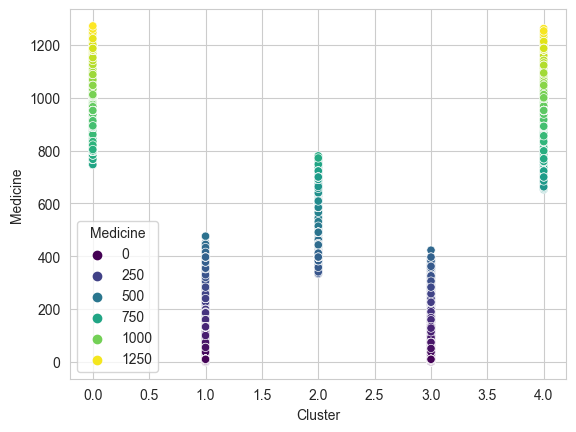

In [34]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data
df_clustering = df[['MRP', 'Best Price']]
df_clustering['Medicine'] = LabelEncoder().fit_transform(df['Medicine'])
df_clustering['Strength'] = LabelEncoder().fit_transform(df['Strength'])

# Using KMeans for clustering
kmeans = KMeans(n_clusters=5)  # 5 clusters as an example
df_clustering['Cluster'] = kmeans.fit_predict(df_clustering)

# Plotting clusters
#plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clustering, x='Cluster', y='Medicine', hue='Medicine', palette='viridis')
plt.show()

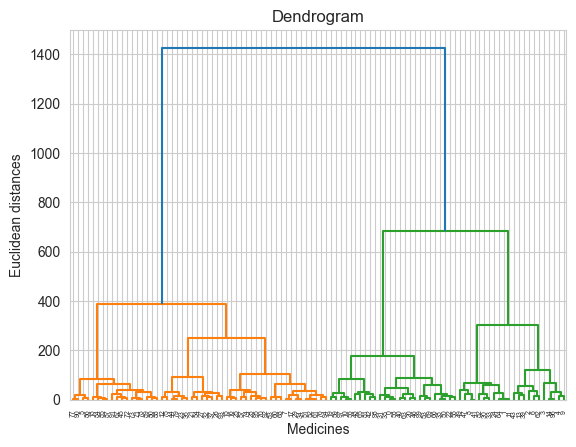

c:\Users\aryan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\aryan\AppData\Local\Temp\ipykernel_23308\671932064.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = hc.fit_predict(X)


In [35]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Hierarchical clustering
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Medicines')
plt.ylabel('Euclidean distances')
plt.show()

# Creating clusters
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
X['Cluster'] = hc.fit_predict(X)

C:\Users\aryan\AppData\Local\Temp\ipykernel_23308\1876893754.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = dbscan.fit_predict(X)


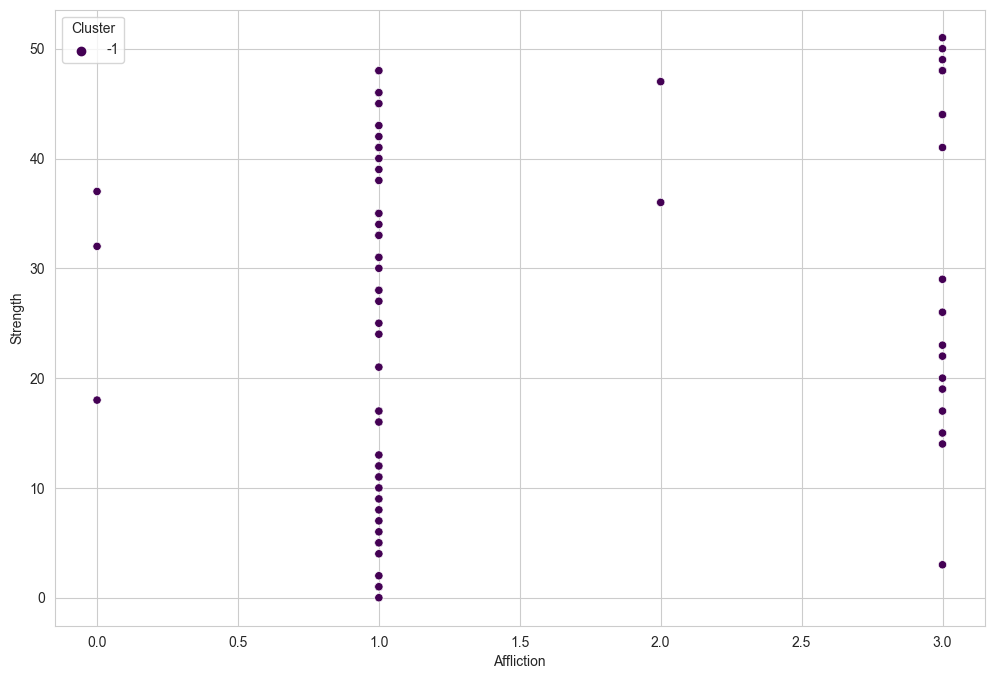

In [36]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3, min_samples=4)
X['Cluster'] = dbscan.fit_predict(X)

plt.figure(figsize=(12, 8))
sns.scatterplot(data=X, x='Affliction', y='Strength', hue='Cluster', palette='viridis')
plt.show()

In [37]:
df.to_csv('netmeds_Segregated.csv')